<img src="DBSCAN.png" width="500" height="400" align="right"/>

# DBSCAN: Outlier Detection 
  
Author: Christoph Güttner  

**Abstract:**  
The Density-Based Spatial Clustering of Applications with Noise  
(DBSCAN) is used here to cluster density-connected points (clusters)    
and detect outliers in a spherical dataset with logistic distributed     
two dimanesional data points.  
   
The main idea behind the DBSCAN algorithm is the ε-neighborhood,  
which  determines the density metric. The number of points j  
within within the ε-neighborhood of i determines wether i is  
a corner- or borderpoint, or an outlier. There are two relevant  
hyperparameter esp, wich describes a radius, and min_samples which  
describes the minimal number of neighbouring points required to  
be a core point. Each cluster contains at least one core point,    
plus the direct or indirect reachable points.  

DBSCAN Is non-hierachical and non parametric algorithm with  
linear complexity (without further indexing problems).  



In [1]:
import numpy as np
from scipy.special import gammainc
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

In [2]:

def sample_logistic(center,radius,n_samples):
    ndim = center.size
    x = np.random.logistic(0,0.7,size=(n_samples, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = radius*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_samples,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p

def plot_datapoints(data):
    plt.figure( figsize=(7,7))
    plt.scatter(data[:,0],data[:,1],s=12)
    plt.title('DataPoints', fontdict = {'fontsize' : 20})
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.gca().set_aspect('equal')


def plot_corepoints(data, core_points):
    plt.figure(figsize=(7,7))
    plt.scatter(data[:,0],data[:,1], color='b')
    for k in core_points:
        plt.scatter(data[k,0],data[k,1], s=90,facecolors='none', edgecolors='r')
    plt.gca().set_aspect('equal')
    plt.title('CorePoints')
    plt.legend(['data','corepoint'])

def get_labels(data, eps=0.3, min_samples=15):
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
    core_points = clustering.core_sample_indices_
    labels = clustering.labels_
    n_clusters = labels.max()
    return labels, core_points, n_clusters

def show_cores_and_clusters(data, labels,core_points,eps, min_samples):
    fig= plt.figure(figsize=(14,7))
    ax1 = fig.add_subplot(1,2,1)
    ax1.scatter(data[:,0],data[:,1], color='b')
    for k in core_points:
        cir=plt.Circle((data[k,0],data[k,1]), eps, color='r',fill=False)
        ax1.add_patch(cir)
    ax1.set_aspect('equal')

    ax1.set_title('CorePoints')
    ax2 = fig.add_subplot(1,2,2)
    for i, label in enumerate(labels):
        ax2.scatter(data[i,0], p[i,1], c = COLORS[label], marker='o', s=400)
    ax2.set_aspect('equal')
    ax2.set_title('cluster')



## Theory  

**ε-Neighborhood:**  
The radius of the ε-neighborhood is specified by the distance function  
and the metric (here Euclidian). The ε-neighborhood serves as a measure  
for similarity and is determined by the hyperparamter esp. DBSCAN can be  
used with any distance function. Hence, the distance function can be  
considered as an additional hyperparameter.  
DBSCAN is non-parametric in the sense that no shape or latent  
generative distribution of the clusters is presupposed. Hence, DBSCAN can  
find arbitrarily-shaped clusters and avoid the so-called single-link effect,  
due to the min_samples parameter.  DBSCAN is non-hierachical in the sense that there  
exists no meta-clustering for clusters. 
   
The DBSCAN Algorithm is based on the following concepts. 

**CorePoints:**  
A point is a corepoint if equal or more than min_samples (hyperparameter) are in  
its ε-neighborhood (directly reachable). Each cluster contains at least one core point.

**BorderPoints:**  
Border points are connected components of corepoints, however, they themself have  
less than min_sample points in there ε-neighborhood.  
Border points are part of the cluster (reachable points). Border points can be edge  
points that have two corepoints from different clusters in there ε-neighborhood.  
If (and only if) edge points exists, the order of clustering dynamics starts playing  
a role (asymmetric clustering). 
  
**Outliers:**  
Outlieres (here darkblue) have neither min_sample points nor any corepoint in  
there ε-neighborhood. Outliers lie in low-density regions and are not reachable from  
any corepoint. 

The adavantages of DBSCAN are that it does not require one to specify the number  
of clusters a priori. The hyperparameters min_samples and ε can be set  
by a domain expert, if the data is well understood, as well as if not.

## Data

In [3]:
COLORS = np.array(['#C67052','#CF9546','#7A989A','#849271','#C67052','#3F6F76','#69B7CE','#C1AE8D','#F588AF','#FD814E','#162B3D'])

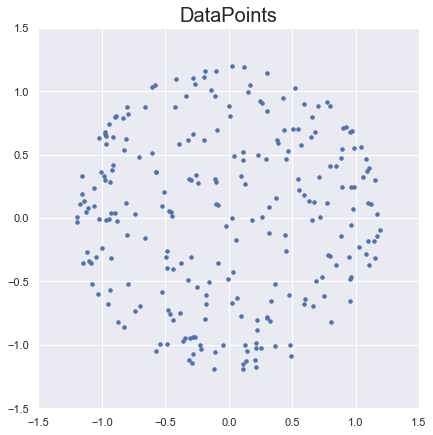

In [4]:
np.random.seed(42)
center = np.array([0,0])
radius = 1.2
n_samples = 250

p = sample_logistic(center,radius,n_samples )
plot_datapoints(p)

## Core_Points

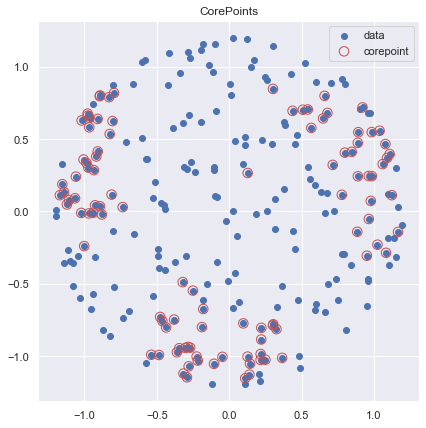

In [5]:
eps=0.3
min_samples=15

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
plot_corepoints(p, core_points)

## Clustering 

## 4 clusters plus outliers

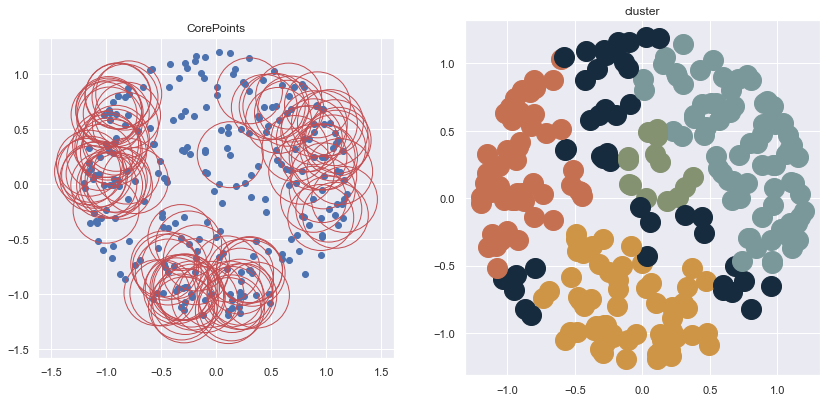

In [6]:
eps=0.3
min_samples=15

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points ,eps, min_samples)

## 3 clusters plus outliers

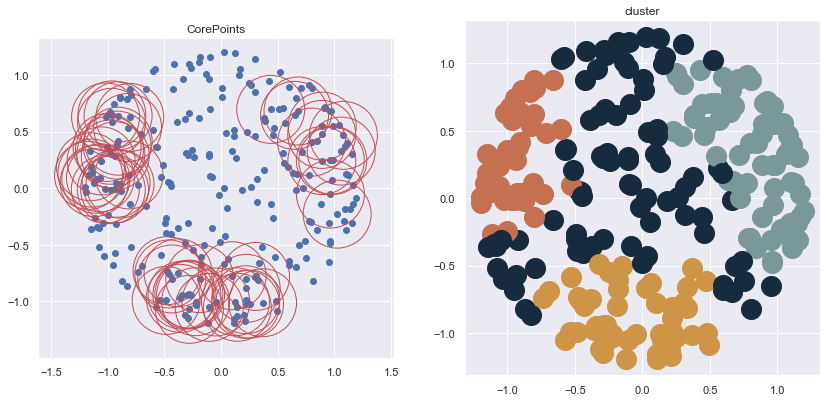

In [7]:
eps=0.3
min_samples=17

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)

## 2 clusters plus outliers

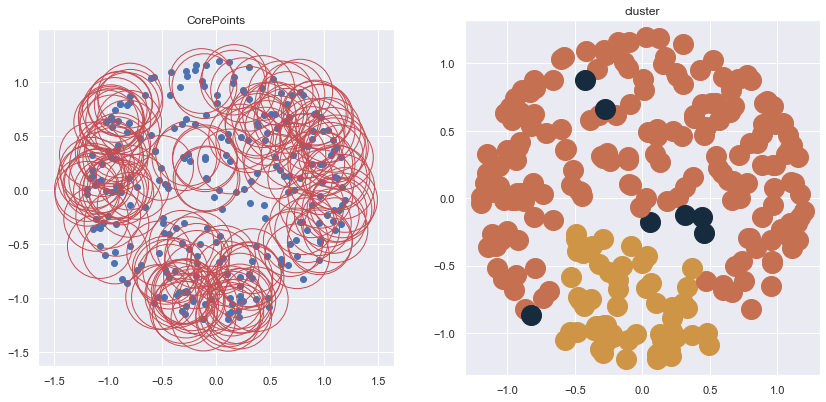

In [8]:
eps=0.3
min_samples=12

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)

## 8 clusters plus outliers

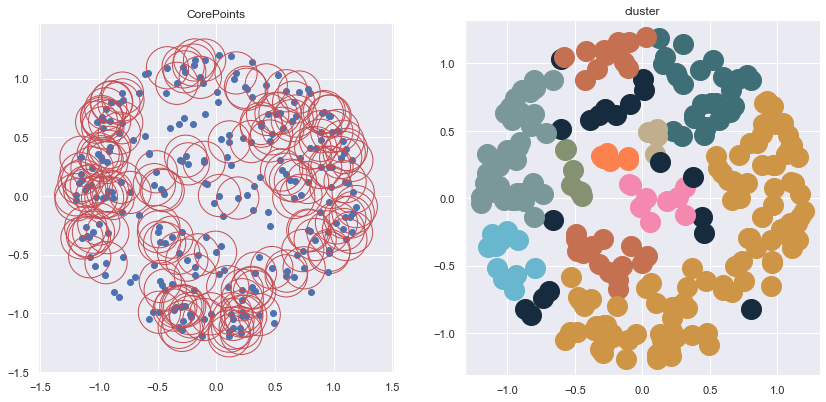

In [9]:
eps=0.18
min_samples=5

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)

## 1 cluster (big coalition)

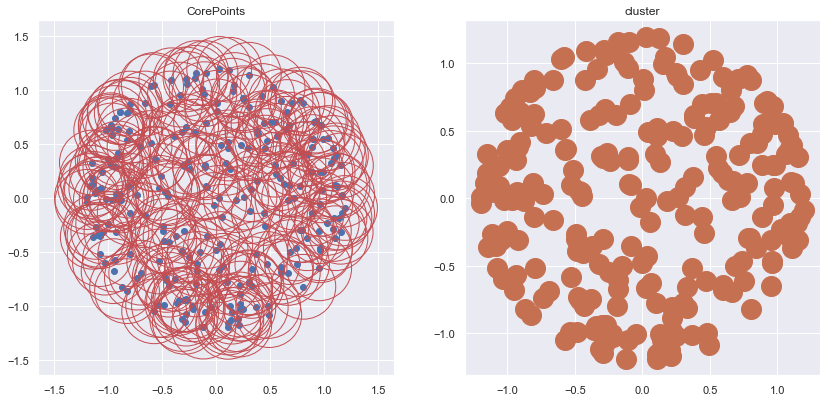

In [10]:
eps=0.3
min_samples=5

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)

## 3 cluster plus outliers

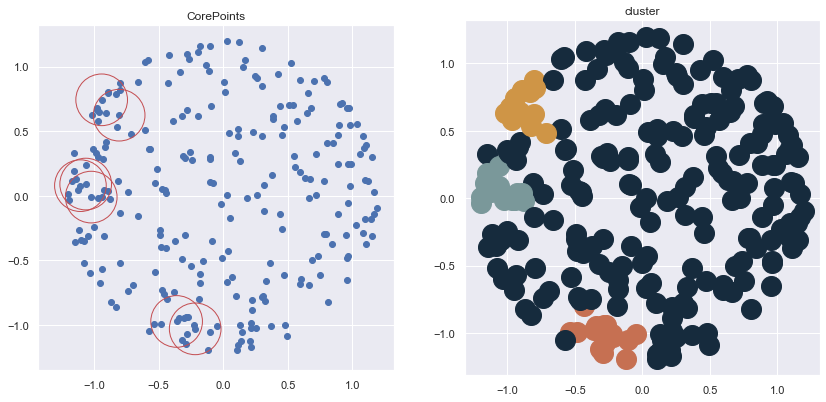

In [11]:
eps=0.2
min_samples=13

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)

## only outliers

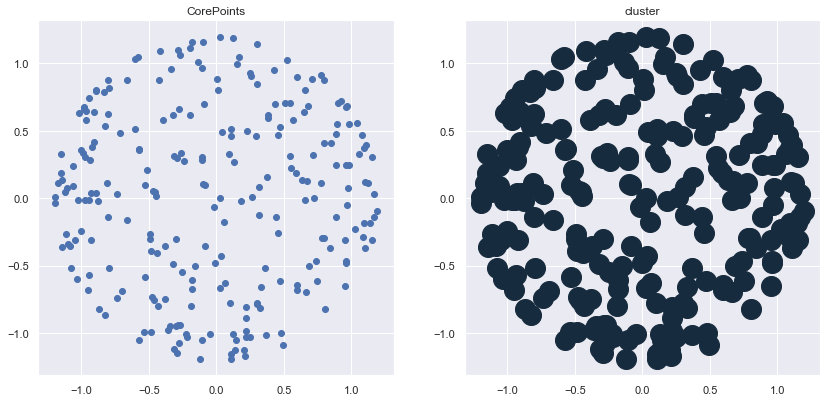

In [12]:
eps=0.1
min_samples=17

labels, core_points, n_clusters = get_labels(p, eps, min_samples)
show_cores_and_clusters(p, labels,core_points,eps, min_samples)